In [1]:
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 10.8 MB/s eta 0:00:00


In [2]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 KB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=b54980dc4476946a259654d28078224a36152986eec571532c45a4cedbf15fe1
  Stored in directory: /root/.cache/pip/wheels/72/b8/3b/a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [3]:
import unidecode
import pandas as pd
import re
import time
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import timeit

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/DS')

Mounted at /DS


In [74]:

def open_file(filepath):
    with open(filepath, 'r', encoding='cp1252') as infile:
        return infile.read()


In [75]:
texts = open_file('/DS/MyDrive/DS/DataLaw.txt')


In [68]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [69]:
from nltk.corpus import stopwords

In [70]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [76]:
texts=nltk.sent_tokenize(texts)
#sentences

In [72]:
# Cleaning the texts
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
from nltk.stem import WordNetLemmatizer


In [77]:

ps = PorterStemmer()
#
#texts = nltk.sent_tokenize(texts)

In [79]:
wordnet=WordNetLemmatizer()

In [78]:
corpus = []

for i in range(len(texts)):
    # ^ mane not,,,, ekhane a-z chara baki sob kisu " " dara replace korbe
    review = re.sub('[^a-zA-Z]', ' ', texts[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [80]:
corpus = []

for i in range(len(texts)):
    # ^ mane not,,,, ekhane a-z chara baki sob kisu " " dara replace korbe
    review = re.sub('[^a-zA-Z]', ' ', texts[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [85]:
texts=str(corpus)

In [86]:

def remove_newlines_tabs(text):

    
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text
# len of data :- 1618647 lac words

In [87]:
texts=remove_newlines_tabs(texts)

In [88]:
def remove_whitespace(text):

    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text 

In [89]:
texts=remove_whitespace(texts)

In [90]:
# Code for removing repeated characters and punctuations

def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters 
    for alphabets and to one character for punctuations.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Finally formatted text with alphabets repeating to 
        two characters & punctuations limited to one repeatition 
        
    Example:
    Input : Realllllllllyyyyy,        Greeeeaaaatttt   !!!!?....;;;;:)
    Output : Reallyy, Greeaatt !?.;:)
    
    """
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

In [91]:
texts=reducing_incorrect_character_repeatation(texts)

In [92]:

# The code for removing special characters
def removing_special_characters(text):

    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[^a-zA-Z0-9$-,%.?!]+", ' ', text)
    #print("Formatted_Text : ",Formatted_Text)
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    return Formatted_Text


In [93]:
texts=removing_special_characters(texts)

In [94]:

# The code for spelling corrections
def spelling_correction(text):
    ''' 
    This function will correct spellings.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text after corrected spellings.
        
    Example: 
    Input : This is Oberois f3rom Dlhi whoop came heree to studdy.
    Output : This is Oberoi from Delhi who came here to study.
      
    
    '''
    # Check for spellings in English language
    spell = Speller(lang='en')
    Corrected_text = spell(text)
    return Corrected_text


In [95]:
texts=spelling_correction(texts)

In [96]:

# convert to lower case
corpus_raw = texts.lower()
corpus_raw

" 'disclaimer translation contained website unofficial', 'original solvent text law regulation legal effect translation used solely reference material aid understanding solvent law regulation', 'government republic slovenia responsible accuracy reliability currency translation provided website consequence resulting use information website', 'purpose interpreting applying law legal issue dispute user consult original solvent text published official gazette republic slovenia', 'unofficial consolidated version agricultural land act comprises agricultural land act zz official gazette republic slovenia radii list r', 'october decision abrogating provision paragraph two article agricultural land act official gazette republic slovenia radii list r', 'april replacement retail price index cost living index act nid official gazette republic slovenia radii list r', 'january agriculture act name official gazette republic slovenia radii list r', 'june decision abrogating first sentence paragraph tw

In [97]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
print(words) 

["'disclaimer", 'translation', 'contained', 'website', "unofficial',", "'original", 'solvent', 'text', 'law', 'regulation', 'legal', 'effect', 'translation', 'used', 'solely', 'reference', 'material', 'aid', 'understanding', 'solvent', 'law', "regulation',", "'government", 'republic', 'slovenia', 'responsible', 'accuracy', 'reliability', 'currency', 'translation', 'provided', 'website', 'consequence', 'resulting', 'use', 'information', "website',", "'purpose", 'interpreting', 'applying', 'law', 'legal', 'issue', 'dispute', 'user', 'consult', 'original', 'solvent', 'text', 'published', 'official', 'gazette', 'republic', "slovenia',", "'unofficial", 'consolidated', 'version', 'agricultural', 'land', 'act', 'comprises', 'agricultural', 'land', 'act', 'zz', 'official', 'gazette', 'republic', 'slovenia', 'radii', 'list', "r',", "'october", 'decision', 'abrogating', 'provision', 'paragraph', 'two', 'article', 'agricultural', 'land', 'act', 'official', 'gazette', 'republic', 'slovenia', 'radi

In [98]:
# so that all duplicate words are removed
words = set(words) 
words

{'bird',
 'represent',
 'uniform',
 'number',
 'beginning',
 'allocated',
 'identification',
 "le',",
 'organic',
 'grazing',
 'capacity',
 'aid',
 'suspension',
 'individual',
 'time',
 'regulation',
 'cycling',
 "'june",
 'urban',
 "'person",
 "'administrative",
 'importance',
 'appointed',
 'wire',
 'compactness',
 'storey',
 'becomes',
 'relocation',
 'value',
 'thereto',
 'provisional',
 'afterwards',
 'planned',
 'linked',
 'stage',
 'amounting',
 'shall',
 'implementing',
 'convert',
 'whether',
 "'july",
 "hectare',",
 "'investor",
 'underpass',
 'enabling',
 'ii',
 'office',
 'growth',
 'budget',
 'citing',
 'fence',
 'allotted',
 'distance',
 'percentage',
 'source',
 'nid',
 'blind',
 'return',
 "'roofed",
 'substance',
 'lower',
 "eur',",
 'rationally',
 'watering',
 'cleaning',
 'environmental',
 'legal',
 'trail',
 'decision',
 'converted',
 'beehive',
 'mr',
 'prescribe',
 'located',
 "water',",
 'use',
 'assigned',
 'obtaining',
 'overlaid',
 'engineering',
 'nature',
 

In [99]:
word2int = {}
int2word = {}
# gives the total number of unique words
vocab_size = len(words)
vocab_size


1002

In [100]:
texts=texts.replace("2017)","2017")

In [101]:
#{'he', 'is', 'king', 'queen', 'royal', 'she', 'the'}

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print("word2int : ",word2int) 
print("int2word : ",int2word) 

word2int :  {'bird': 0, 'represent': 1, 'uniform': 2, 'number': 3, 'beginning': 4, 'allocated': 5, 'identification': 6, "le',": 7, 'organic': 8, 'grazing': 9, 'capacity': 10, 'aid': 11, 'suspension': 12, 'individual': 13, 'time': 14, 'regulation': 15, 'cycling': 16, "'june": 17, 'urban': 18, "'person": 19, "'administrative": 20, 'importance': 21, 'appointed': 22, 'wire': 23, 'compactness': 24, 'storey': 25, 'becomes': 26, 'relocation': 27, 'value': 28, 'thereto': 29, 'provisional': 30, 'afterwards': 31, 'planned': 32, 'linked': 33, 'stage': 34, 'amounting': 35, 'shall': 36, 'implementing': 37, 'convert': 38, 'whether': 39, "'july": 40, "hectare',": 41, "'investor": 42, 'underpass': 43, 'enabling': 44, 'ii': 45, 'office': 46, 'growth': 47, 'budget': 48, 'citing': 49, 'fence': 50, 'allotted': 51, 'distance': 52, 'percentage': 53, 'source': 54, 'nid': 55, 'blind': 56, 'return': 57, "'roofed": 58, 'substance': 59, 'lower': 60, "eur',": 61, 'rationally': 62, 'watering': 63, 'cleaning': 64, 

In [102]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
#raw_sentences


In [103]:
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
#print(sentences)

In [104]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 

            if nb_word != word:
                #print(word,"   ",nb_word)
                data.append([word, nb_word])
        #print("*******************************************")
    #print(data)

#print(data)

In [105]:
texts=texts.replace("2017)","2017")

In [106]:
import numpy as np
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


In [107]:
# meaning 34 training points, where each point has 7 dimensions
print(x_train.shape, y_train.shape)

(18482, 1002) (18482, 1002)


In [108]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))


Instructions for updating:
non-resource variables are not supported in the long term


In [109]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [110]:

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

prediction

<tf.Tensor 'Softmax:0' shape=(?, 1002) dtype=float32>

In [111]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)


n_iters = 100
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  10.275049
loss is :  10.140592
loss is :  10.029323
loss is :  9.936919
loss is :  9.859898
loss is :  9.795424
loss is :  9.741188
loss is :  9.695307
loss is :  9.656254
loss is :  9.622794
loss is :  9.593933
loss is :  9.568864
loss is :  9.546931
loss is :  9.527601
loss is :  9.510437
loss is :  9.495081
loss is :  9.481238
loss is :  9.468667
loss is :  9.457167
loss is :  9.446568
loss is :  9.436734
loss is :  9.427547
loss is :  9.418915
loss is :  9.4107485
loss is :  9.4029875
loss is :  9.39557
loss is :  9.388451
loss is :  9.381587
loss is :  9.3749485
loss is :  9.368504
loss is :  9.362227
loss is :  9.3561
loss is :  9.350106
loss is :  9.344227
loss is :  9.338452
loss is :  9.332772
loss is :  9.327175
loss is :  9.321655
loss is :  9.316205
loss is :  9.310818
loss is :  9.30549
loss is :  9.300218
loss is :  9.294996
loss is :  9.289824
loss is :  9.284695
loss is :  9.27961
loss is :  9.274566
loss is :  9.26956
loss is :  9.264591
loss is :  9.259658


**Create a vector**

In [112]:
vectors = sess.run(W1 + b1)
vectors

array([[-1.290349  , -0.96351326, -1.1395507 , -0.943287  ,  0.24779817],
       [ 0.1512588 , -1.0718514 ,  0.4240922 , -0.33293077,  0.14109376],
       [ 0.455952  ,  0.34497812, -0.4337136 ,  0.47686312, -1.8514649 ],
       ...,
       [ 0.8579559 ,  0.5845091 , -0.8869138 ,  0.16118905,  0.51463693],
       [ 0.9918661 ,  0.09375454, -0.46682885, -0.08466437, -0.13388887],
       [ 1.0680686 , -1.8648427 ,  0.36365345,  0.40244588,  0.42046732]],
      dtype=float32)

In [113]:

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [114]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [115]:



from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')


bird -0.24139395
represent 0.41964546
uniform -0.8611762
number 0.6672897
beginning -0.849032
allocated -0.34286794
identification 0.47201037
le', -0.8170342
organic -0.88767135
grazing 0.7984544
capacity -0.8320978
aid 0.95371747
suspension 0.9999149
individual -0.4154172
time -0.45778304
regulation 0.8411302
cycling 0.9613088
'june 0.57256943
urban 0.6474141
'person -0.4397677
'administrative -0.915435
importance -0.060590003
appointed -0.7428799
wire 0.99999696
compactness 0.42457983
storey -0.79832286
becomes -0.99428695
relocation -0.9922245
value -0.119792774
thereto 0.30031005
provisional 0.7335352
afterwards -0.9429151
planned -0.36167863
linked 0.93263644
stage 0.96619755
amounting 0.07684246
shall 0.3706484
implementing 0.37737823
convert -0.6856056
whether 0.9997793
'july -0.8772504
hectare', -0.23755777
'investor -0.9248255
underpass -0.93636954
enabling -0.9866895
ii 0.8200114
office -0.62739766
growth 0.8622751
budget 0.39884618
citing 0.0164629
fence 0.32172725
allotted 

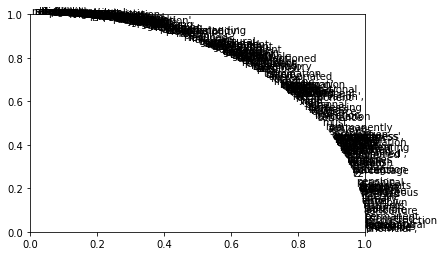

In [116]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()

